In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

In [42]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Fronalpstock_big.jpg/800px-Fronalpstock_big.jpg'
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)

In [43]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [44]:
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

In [45]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3  # Number of clusters
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [46]:
# Convert centers to 8-bit values
centers = np.uint8(centers)

In [47]:
# Map the labels to the center values
segmented_image = centers[labels.flatten()]

# Reshape the segmented image to the original image shape
segmented_image = segmented_image.reshape(image.shape)

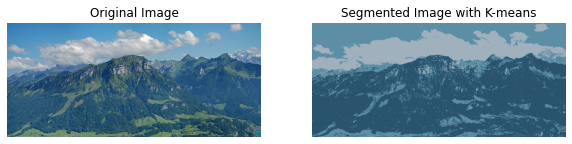

In [48]:
# Display the original and segmented images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Image with K-means')
plt.imshow(segmented_image)
plt.axis('off')

plt.show()

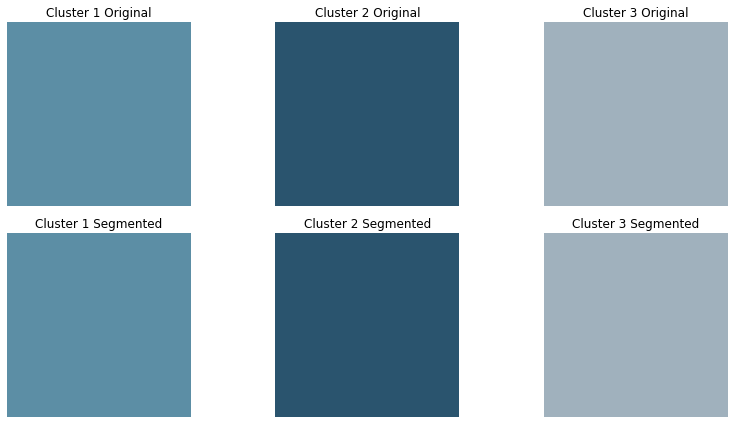

Cluster 1: Original Mean Color: [ 92.90724 142.18944 165.9082 ], Segmented Mean Color: [ 92 142 165]
Cluster 2: Original Mean Color: [ 42.713947  84.39792  110.38863 ], Segmented Mean Color: [ 42  84 110]
Cluster 3: Original Mean Color: [160.1698  177.44855 189.85788], Segmented Mean Color: [160 177 189]


In [51]:
labels_image = labels.reshape(image.shape[:2])

# Initialize an array to hold the mean color per cluster for the original image
mean_colors_original = np.zeros((k, 3), dtype=np.float32)

# Calculate the mean color for each cluster in the original image
for i in range(k):
    # Find all pixels in this cluster
    mask = labels_image == i
    # Use the mask to select pixels from the original RGB image
    cluster_pixels = image[mask]
    # Calculate the mean color of these pixels
    mean_colors_original[i] = np.mean(cluster_pixels, axis=0)

# Convert centers (segmented mean colors) to a proper format for display
mean_colors_segmented = centers.astype(np.uint8)

# Display the mean colors of each segment from both the original and the segmented image
plt.figure(figsize=(12, 6))
for i in range(k):
    plt.subplot(2, k, i + 1)
    plt.title(f'Cluster {i + 1} Original')
    plt.imshow([[(mean_colors_original[i] / 255).tolist()]])  # Normalize and convert to list for matplotlib
    plt.axis('off')

    plt.subplot(2, k, k + i + 1)
    plt.title(f'Cluster {i + 1} Segmented')
    plt.imshow([[(mean_colors_segmented[i] / 255).tolist()]])  # Normalize for display
    plt.axis('off')

plt.tight_layout()
plt.show()

# Print the RGB values of each cluster for comparison
for i in range(k):
    print(f'Cluster {i + 1}: Original Mean Color: {mean_colors_original[i]}, Segmented Mean Color: {mean_colors_segmented[i]}')